In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from pylab import *

import arviz as az
import h5py
import pandas as pd
import seaborn as sns
import qnm

import ringdown

sns.set_context('notebook')
sns.set_palette('colorblind')

In [3]:
tinit=0.84
M_est = 68.5
chi_est = 0.69

In [4]:
prefix='longer/'
# prefix=''

all_no_filter_A0=np.loadtxt(prefix+'all/A0'+str(tinit))
all_no_filter_A1=np.loadtxt(prefix+'all/A1'+str(tinit))
all_no_filter_mass=np.loadtxt(prefix+'all/mass'+str(tinit))
all_no_filter_spin=np.loadtxt(prefix+'all/spin'+str(tinit))

filter_220_2_A0=np.loadtxt(prefix+'220_2/A0'+str(tinit))
filter_220_2_A1=np.loadtxt(prefix+'220_2/A1'+str(tinit))

filter_220_1_A1=np.loadtxt(prefix+'220_1/A1'+str(tinit))
filter_220_1_mass=np.loadtxt(prefix+'220_1/mass'+str(tinit))
filter_220_1_spin=np.loadtxt(prefix+'220_1/spin'+str(tinit))


filter_221_1_mass=np.loadtxt(prefix+'221_1/mass'+str(tinit))
filter_221_1_spin=np.loadtxt(prefix+'221_1/spin'+str(tinit))
filter_221_1_A0=np.loadtxt(prefix+'221_1/A1'+str(tinit))

filter_2201_A1=np.loadtxt(prefix+'2201/A1'+str(tinit))

filter_221_2_A0=np.loadtxt(prefix+'221_2/A0'+str(tinit))
filter_221_2_A1=np.loadtxt(prefix+'221_2/A1'+str(tinit))

In [6]:
!open ./

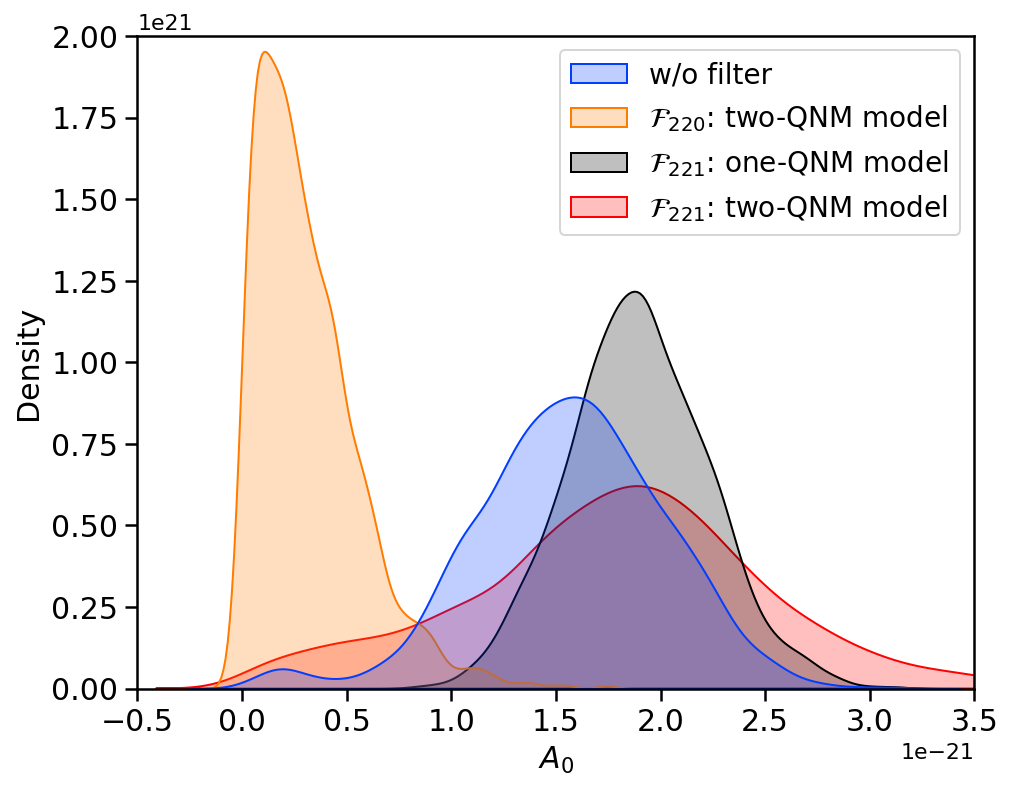

In [7]:
f, axs = plt.subplots(1,1,figsize=(7.5,6))
df=pd.DataFrame(data=np.c_[all_no_filter_A0,\
                           filter_220_2_A0,filter_221_1_A0/0.485,filter_221_2_A0/0.485],
                    columns=[r'w/o filter',r'$\mathcal{F}_{220}$: two-QNM model'\
                             ,r'$\mathcal{F}_{221}$: one-QNM model',r'$\mathcal{F}_{221}$: two-QNM model'])

# g=sns.displot(df , kind="kde", fill=True, palette=sns.color_palette('bright')[:3])
g=sns.kdeplot(data=df , fill=True, palette=[sns.color_palette('bright')[0],sns.color_palette('bright')[1],'k','r'],ax=axs,common_norm=False)
handles = g.legend_.legendHandles
xlabel(r'$A_0$')
axs.set_ylim(0,2e21)
axs.set_xlim(-0.5e-21,3.5e-21)
axs.legend(fontsize=14,handles=handles,labels=[r'w/o filter',r'$\mathcal{F}_{220}$: two-QNM model'\
                                              ,r'$\mathcal{F}_{221}$: one-QNM model',r'$\mathcal{F}_{221}$: two-QNM model'])
axs.yaxis.label.set_size(15)
axs.tick_params(axis='y',labelsize=15)
axs.xaxis.label.set_size(15)
axs.tick_params(axis='x',labelsize=15)
# sns.move_legend(g, "upper right", bbox_to_anchor=(.7, .95))
savefig('res/A0.pdf')

In [551]:
# df=pd.DataFrame(data=np.c_[all_no_filter_A1,\
#                            filter_220_2_A1/0.485,\
#                            filter_220_1_A1/0.485,filter_2201_A1],
#                     columns=[r'w/o filter',r'$\mathcal{F}_{220}$: two-QNM model',\
#                             r'$\mathcal{F}_{220}$: one-QNM model',r'$\mathcal{F}_{221}\mathcal{F}_{220}$'])
# sns.displot(df , kind="kde", fill=True, palette=sns.color_palette('bright')[:4],common_norm=True)
# ylim(0,2e20)
# xlabel(r'$A_0$')

In [571]:
sns.color_palette('bright')[:3]

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549)]

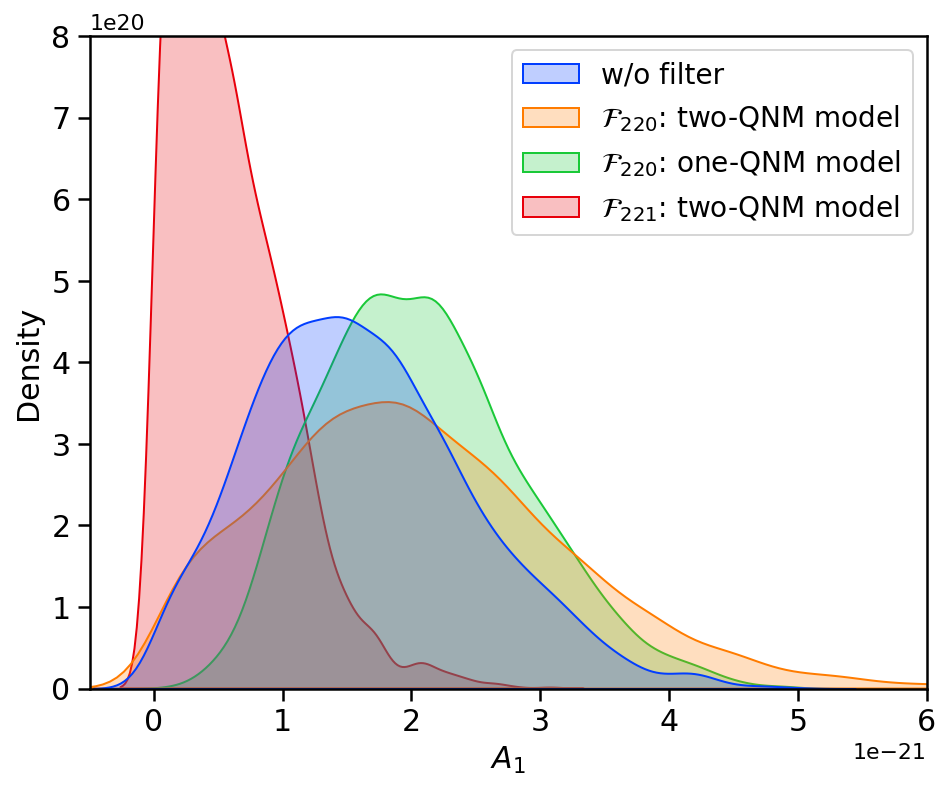

In [610]:
f, axs = plt.subplots(1,1,figsize=(7.5,6))
df=pd.DataFrame(data=np.c_[all_no_filter_A1,\
                           filter_220_2_A1/0.485,\
                           filter_220_1_A1/0.485,filter_221_2_A1],
                    columns=[r'w/o filter',r'$\mathcal{F}_{220}$: two-QNM model',\
                            r'$\mathcal{F}_{220}$: one-QNM model',r'$\mathcal{F}_{221}$: two-QNM model'])

df1=pd.DataFrame(data=np.c_[filter_2201_A1
                           ],
                    columns=[r'$\mathcal{F}_{221}\mathcal{F}_{220}$'])
# legend()
# p=sns.kdeplot(data=df1 , fill=False,ax=axs, palette=['k'], linestyle="--")
# handles = p.legend_.legendHandles
p2=sns.kdeplot(data=df , fill=True, palette=sns.color_palette('bright')[:4],ax=axs,common_norm=False)
handles2 = p2.legend_.legendHandles
axs.legend(fontsize=14,handles=handles2,labels=[r'w/o filter',r'$\mathcal{F}_{220}$: two-QNM model',\
                            r'$\mathcal{F}_{220}$: one-QNM model',r'$\mathcal{F}_{221}$: two-QNM model'])
axs.set_xlim(-0.5e-21,6e-21)
axs.set_ylim(0,8e20)
axs.xaxis.label.set_size(15)
axs.tick_params(axis='x',labelsize=15)

axs.yaxis.label.set_size(15)
axs.tick_params(axis='y',labelsize=15)
xlabel(r'$A_1$')
savefig('res/A1.pdf')

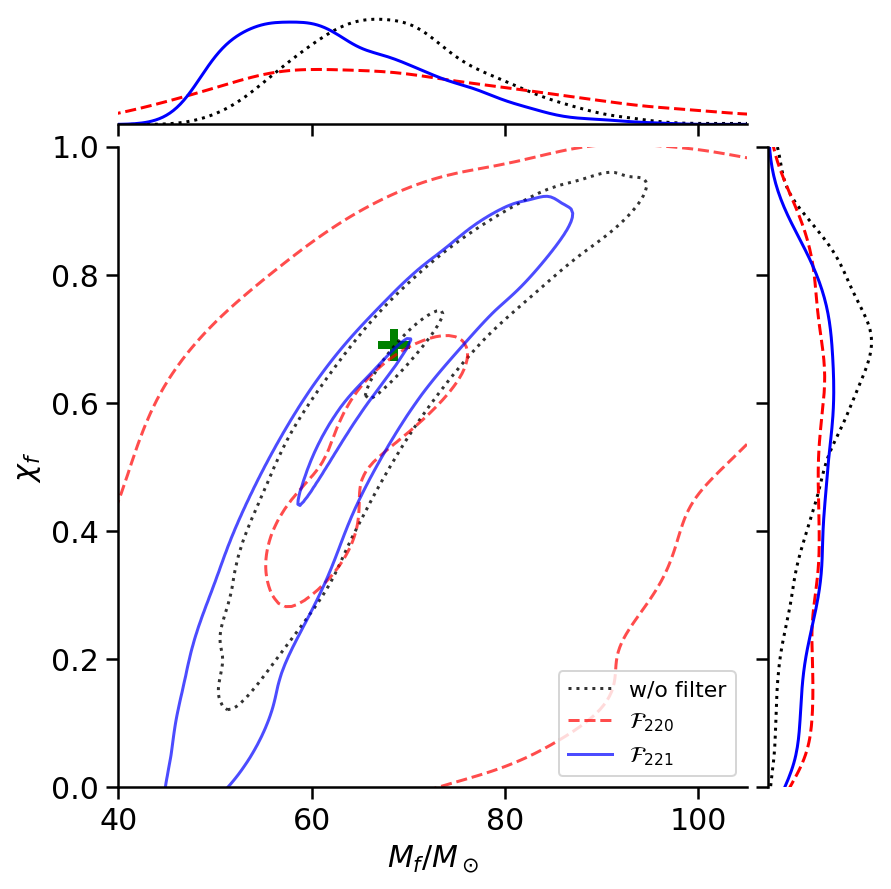

In [547]:
mIMR = M_est
chiIMR = chi_est

g = sns.JointGrid()

df = pd.DataFrame({
    r'$M_f / M_\odot$': all_no_filter_mass,
    r'$\chi_f$':all_no_filter_spin,
    '1': 'w/o filter'
})
df2 = pd.DataFrame({
    r'$M_f / M_\odot$': filter_220_1_mass,
    r'$\chi_f$': filter_220_1_spin,
    '1': r'$\mathcal{F}_{220}$'
})
df4 = pd.DataFrame({
    r'$M_f / M_\odot$': filter_221_1_mass,
    r'$\chi_f$': filter_221_1_spin,
    '1': r'$\mathcal{F}_{221}$'
})
p=sns.kdeplot(data=df, x = r'$M_f / M_\odot$', y = r'$\chi_f$', levels=[0.1, 0.9],alpha=0.8, ax=g.ax_joint,hue='1', palette = ['k'],linestyles=':')
handles = p.legend_.legendHandles[::-1]
handles[0].set_ls(':')
handles[0].set_alpha(0.8)

p2=sns.kdeplot(data=df2, x = r'$M_f / M_\odot$', y = r'$\chi_f$', levels=[0.1, 0.9],alpha=0.7, ax=g.ax_joint,hue='1', palette = ['red'],linestyles='--')
handles2 = p2.legend_.legendHandles[::-1]
handles2[0].set_ls('--')
handles2[0].set_alpha(0.7)

p4=sns.kdeplot(data=df4, x = r'$M_f / M_\odot$', y = r'$\chi_f$', levels=[0.1, 0.9],alpha=0.7, ax=g.ax_joint,hue='1', palette = ['b'])
handles4 = p4.legend_.legendHandles[::-1]
handles4[0].set_alpha(0.7)

pscatter=g.ax_joint.scatter(x=68.5,y=0.69,s=255,marker='+',c='g',linewidths=4,label='IMR')
g.ax_joint.legend(loc='lower right',handles=handles+handles2+handles4,labels=['w/o filter',r'$\mathcal{F}_{220}$',r'$\mathcal{F}_{221}$'])


sns.kdeplot(df[r'$M_f / M_\odot$'], ax=g.ax_marg_x, color = 'k',linestyle=':')
sns.kdeplot(df2[r'$M_f / M_\odot$'], ax=g.ax_marg_x, linestyle="--", color = 'r')
sns.kdeplot(df4[r'$M_f / M_\odot$'], ax=g.ax_marg_x, color = 'b')
sns.kdeplot(y=df[r'$\chi_f$'], ax=g.ax_marg_y, color = 'k',linestyle=':')
sns.kdeplot(y=df2[r'$\chi_f$'], ax=g.ax_marg_y, linestyle="--", color = 'r')
sns.kdeplot(y=df4[r'$\chi_f$'], ax=g.ax_marg_y, color = 'b')
g.ax_joint.set_xlim(40,105)
g.ax_joint.set_ylim(0,1)
g.ax_joint.xaxis.label.set_size(15)
g.ax_joint.yaxis.label.set_size(15)
g.ax_joint.tick_params(axis='x',labelsize=15)
g.ax_joint.tick_params(axis='y',labelsize=15)
savefig('res/mchi_ligo.pdf',bbox_inches='tight')

In [527]:
t_unit=M_est*2950./2/299792458

In [528]:
1.*1e-3/t_unit

2.9671404973400968

In [529]:
5*t_unit

0.0016851241134291644

In [530]:
abs(np.exp(-qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=0.692)[0]*0.44j))

0.8977354264429599